In [1]:
import zipfile,requests
# Download zip file of pizza_steak images
r=requests.get("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip")

with open("10_food_classes_all_data.zip","wb") as f:
    f.write(r.content)
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()



In [2]:

import os

for root,dirs,files in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirs)} directories and {len(files)} images in '{root}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [3]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))


In [5]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_gen=ImageDataGenerator(rescale=1/255,
                            featurewise_center=True,
                                       featurewise_std_normalization=True,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True,
                                       validation_split=0.2)
test_gen=ImageDataGenerator(rescale=1/255,
                            featurewise_center=True,
                                       featurewise_std_normalization=True,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True,
                                       validation_split=0.2)

# train_data=train_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical",seed=42,)

test_data=test_gen.flow_from_directory(test_dir,
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode="categorical",
                                       seed=42)

train_data=test_gen.flow_from_directory(train_dir,
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode="categorical",
                                       seed=42)

Found 2500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


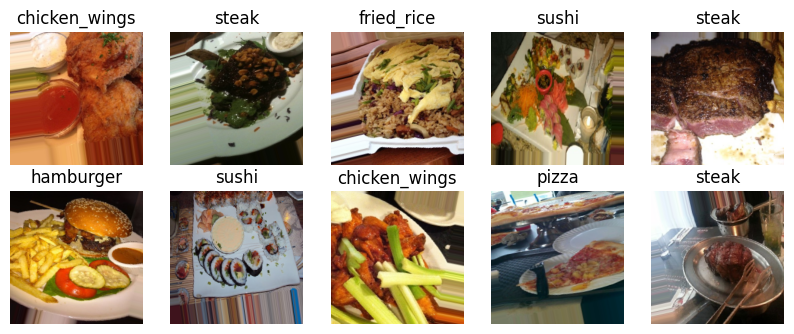

In [7]:

#visualize train_data
import matplotlib.pyplot as plt

def show_batch_images(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(10):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i].argmax()])
        plt.axis(False)

images,labels=next(train_data)

show_batch_images(images,labels)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model=Sequential([
    Conv2D(15, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(15, 3, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(15, 3, activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10, activation='softmax')
])



In [23]:
# comnpile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
# Fit the model
history = model.fit(
    train_data,
    batch_size=32,
    epochs=5,
    validation_data=test_data,
    verbose=1,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
)

Epoch 1/5
235/235 [==============================] - 136s 570ms/step - loss: 2.1478 - accuracy: 0.2248 - val_loss: 2.0315 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 133s 566ms/step - loss: 2.0148 - accuracy: 0.2943 - val_loss: 1.9363 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 132s 562ms/step - loss: 1.9503 - accuracy: 0.3225 - val_loss: 2.0479 - val_accuracy: 0.3136
Epoch 4/5
235/235 [==============================] - 132s 561ms/step - loss: 1.9311 - accuracy: 0.3357 - val_loss: 1.8802 - val_accuracy: 0.3476
Epoch 5/5
235/235 [==============================] - 143s 608ms/step - loss: 1.8750 - accuracy: 0.3509 - val_loss: 1.7969 - val_accuracy: 0.3948


In [25]:
model.evaluate(test_data)

79/79 [==============================] - 34s 434ms/step - loss: 1.8123 - accuracy: 0.3800


[1.8123127222061157, 0.3799999952316284]

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 15)      420       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 15)      2040      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 15)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 15)      2040      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 15)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43740)            

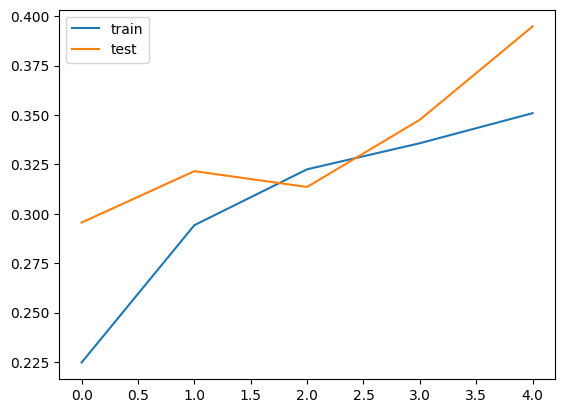

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

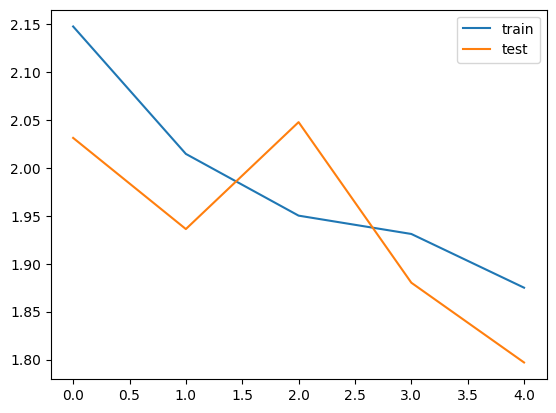

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
# Create the model
model2=Sequential([
    Conv2D(15, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(15, 3, activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [37]:
# comnpile the model
model2.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [38]:
# Fit the model
history2 = model2.fit(
    train_data,
    batch_size=32,
    epochs=10,
    validation_data=test_data,
    verbose=1,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
235/235 [==============================] - 137s 579ms/step - loss: 2.2436 - accuracy: 0.1899 - val_loss: 2.1222 - val_accuracy: 0.2320
Epoch 2/10
235/235 [==============================] - 132s 563ms/step - loss: 2.0995 - accuracy: 0.2529 - val_loss: 2.0141 - val_accuracy: 0.2912
Epoch 3/10
235/235 [==============================] - 131s 558ms/step - loss: 2.0433 - accuracy: 0.2816 - val_loss: 1.9526 - val_accuracy: 0.3208
Epoch 4/10
235/235 [==============================] - 134s 569ms/step - loss: 2.0032 - accuracy: 0.3053 - val_loss: 1.9890 - val_accuracy: 0.3128
Epoch 5/10
235/235 [==============================] - 131s 558ms/step - loss: 1.9689 - accuracy: 0.3151 - val_loss: 1.9608 - val_accuracy: 0.3276
Epoch 6/10
235/235 [==============================] - 129s 551ms/step - loss: 1.9490 - accuracy: 0.3231 - val_loss: 1.9419 - val_accuracy: 0.3324
Epoch 7/10
235/235 [==============================] - 131s 558ms/step - loss: 1.9280 - accuracy: 0.3331 - val_loss: 1.8701 -

In [39]:
model2.evaluate(test_data)

79/79 [==============================] - 33s 415ms/step - loss: 1.7880 - accuracy: 0.3824


[1.7880052328109741, 0.3824000060558319]

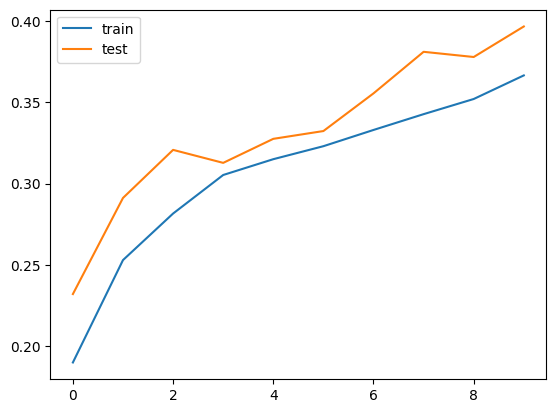

In [40]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

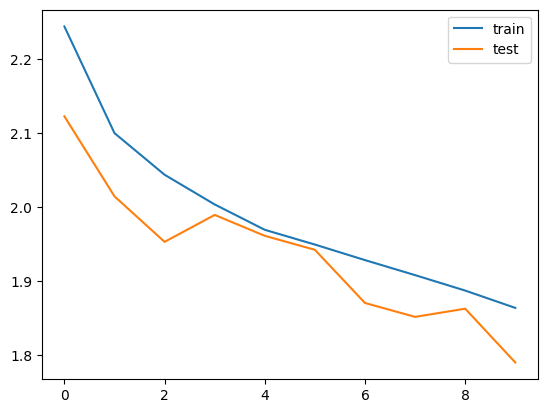

In [41]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()